In [49]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Loading the data
data = pd.read_csv('winequality-red.csv')

### Exploring the Data

In [3]:
# Viewing the head of the data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Finding out the number of observations and features (rows and columns)
data.shape

(1599, 12)

In [5]:
# Data type of each feature
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
# Basic descriptive stats
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# Renaming feature for convenience
data.rename(columns = {'fixed acidity':'fxdacid', 'volatile acidity':'volacid', 'citric acid':'citacid', 'residual sugar':'sugar',
                       'free sulfur dioxide':'freesd', 'total sulfur dioxide':'totalsd'})

,fxdacid,volacid,citacid,sugar,chlorides,freesd,totalsd,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [29]:
# Check for missing values
# check number & percentage of missing values in the columns
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(data)
# hitmaps can be used for checking missing values

Your selected dataframe has 13 columns and 1599 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


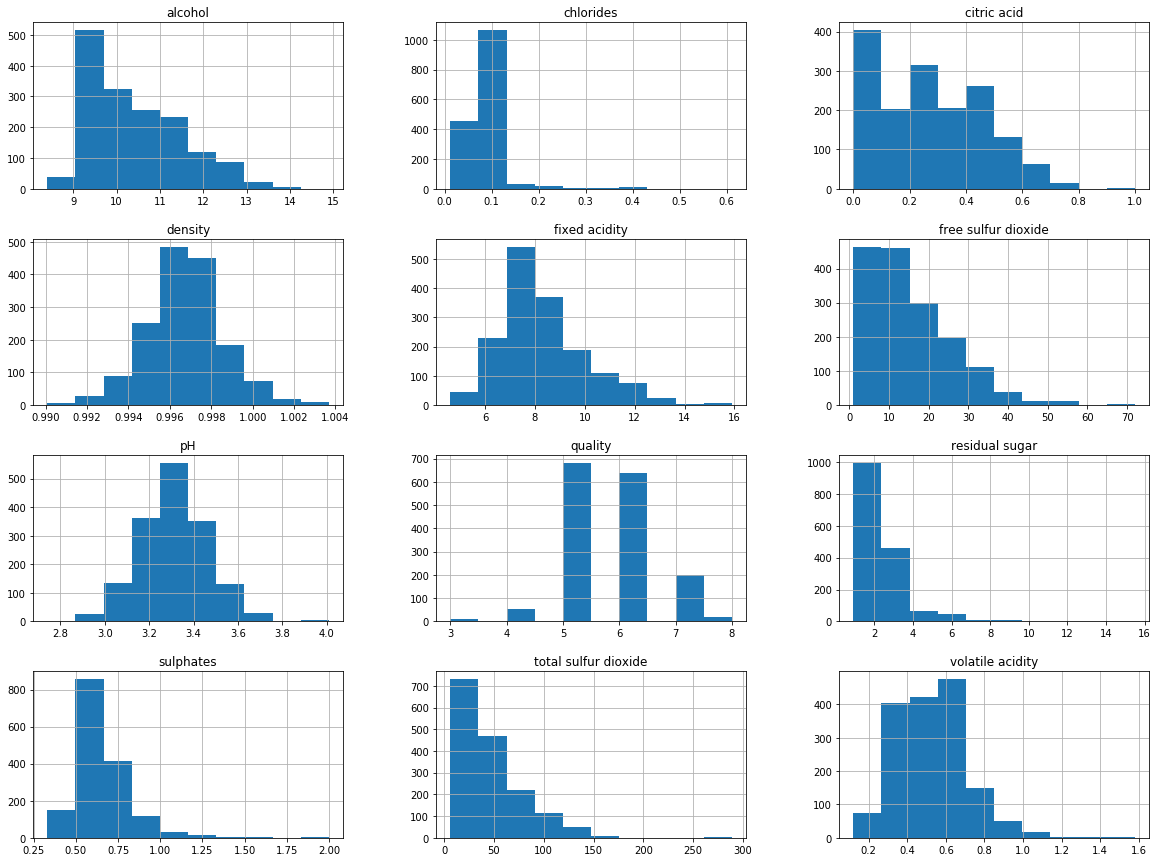

In [8]:
# Creating histograms
plt.rcParams["figure.figsize"] = (20,15)
data.hist()
plt.show()
# Check feature distribution, decide on feature categorization, decide on test usage based on the normality assumption,
# check outliers if present

In [9]:
# Count unique values for each feature
unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in data.columns], 
                                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
11,quality,6
5,free sulfur dioxide,60
10,alcohol,65
2,citric acid,80
8,pH,89
3,residual sugar,91
0,fixed acidity,96
9,sulphates,96
1,volatile acidity,143
6,total sulfur dioxide,144


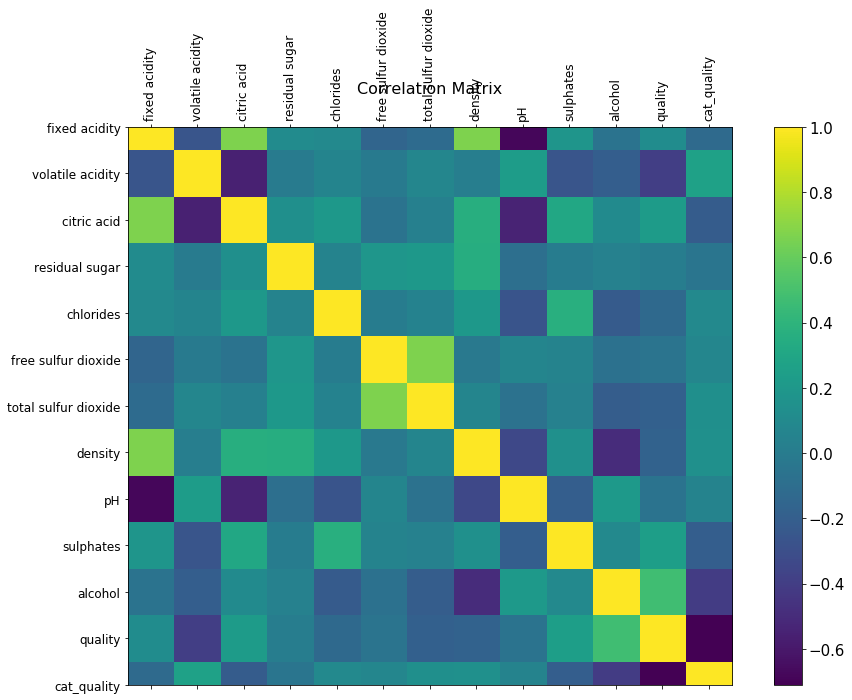

In [38]:
def create_corr_matrix(df):
    f = plt.figure(figsize=(15, 10))
    plt.matshow(df.corr(), fignum=f.number)
    plt.xticks(range(df.shape[1]), df.columns, fontsize=12, rotation=90)
    plt.yticks(range(df.shape[1]), df.columns, fontsize=12)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=15)
    plt.title('Correlation Matrix', fontsize=16)
    
create_corr_matrix(data)

# There is a correlation 

0       low
1       low
2       low
3       low
4       low
       ... 
1594    low
1595    low
1596    low
1597    low
1598    low
Name: cat_quality, Length: 1599, dtype: category
Categories (2, object): [low < high]

In [11]:
unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in data.columns], 
                                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

In [14]:
data['cat_quality'].describe()

count     1599
unique       2
top        low
freq      1382
Name: cat_quality, dtype: object

In [15]:
# Counting low and high values
data['cat_quality'].value_counts()

low     1382
high     217
Name: cat_quality, dtype: int64

### Exploring Correlations

In [39]:
# Categorize the feature quality by using 2 bins (from 0 to 6, from 7 to 10) 
data['cat_quality'] = pd.cut(data['quality'], bins=[0, 6, 10], labels=['low', 'high'])
data['cat_quality']

0       low
1       low
2       low
3       low
4       low
       ... 
1594    low
1595    low
1596    low
1597    low
1598    low
Name: cat_quality, Length: 1599, dtype: category
Categories (2, object): [low < high]

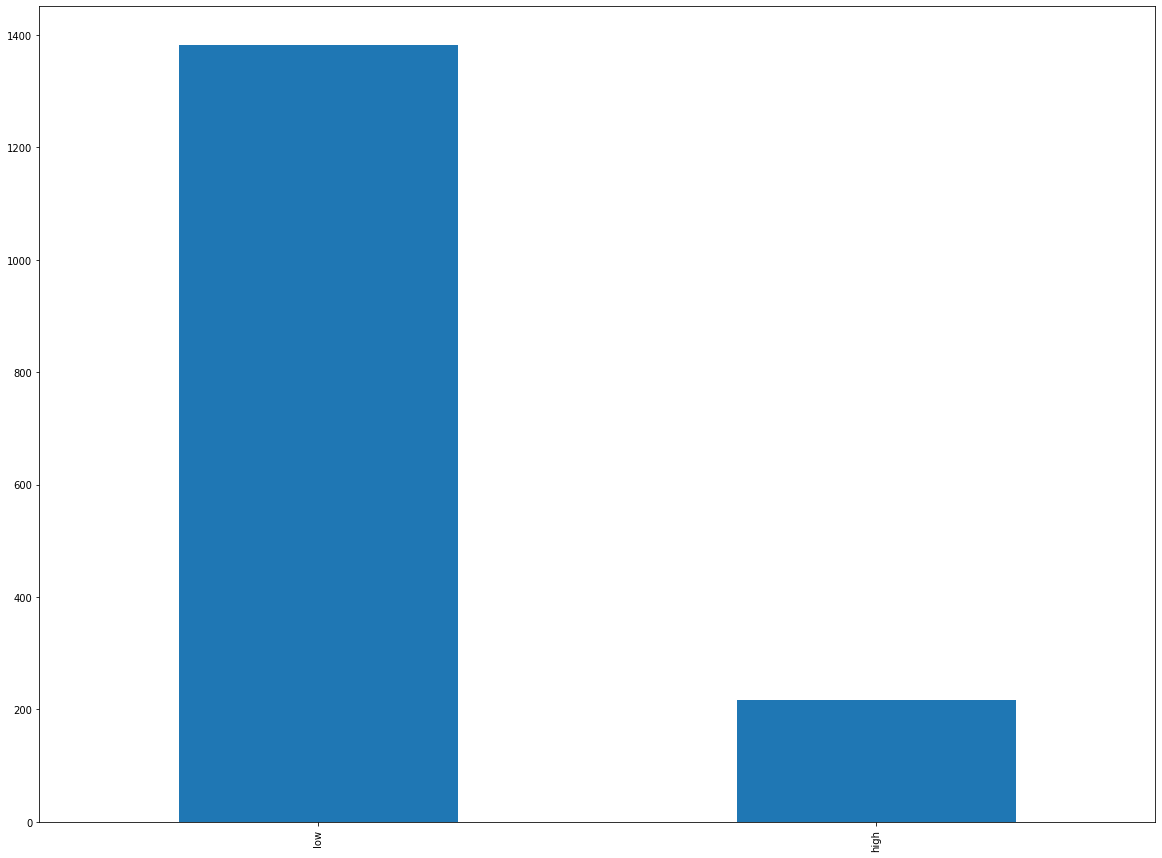

In [16]:
data['cat_quality'].value_counts().plot.bar()
# plt.bar(data['cat_quality'], data['cat_quality'].value_counts())


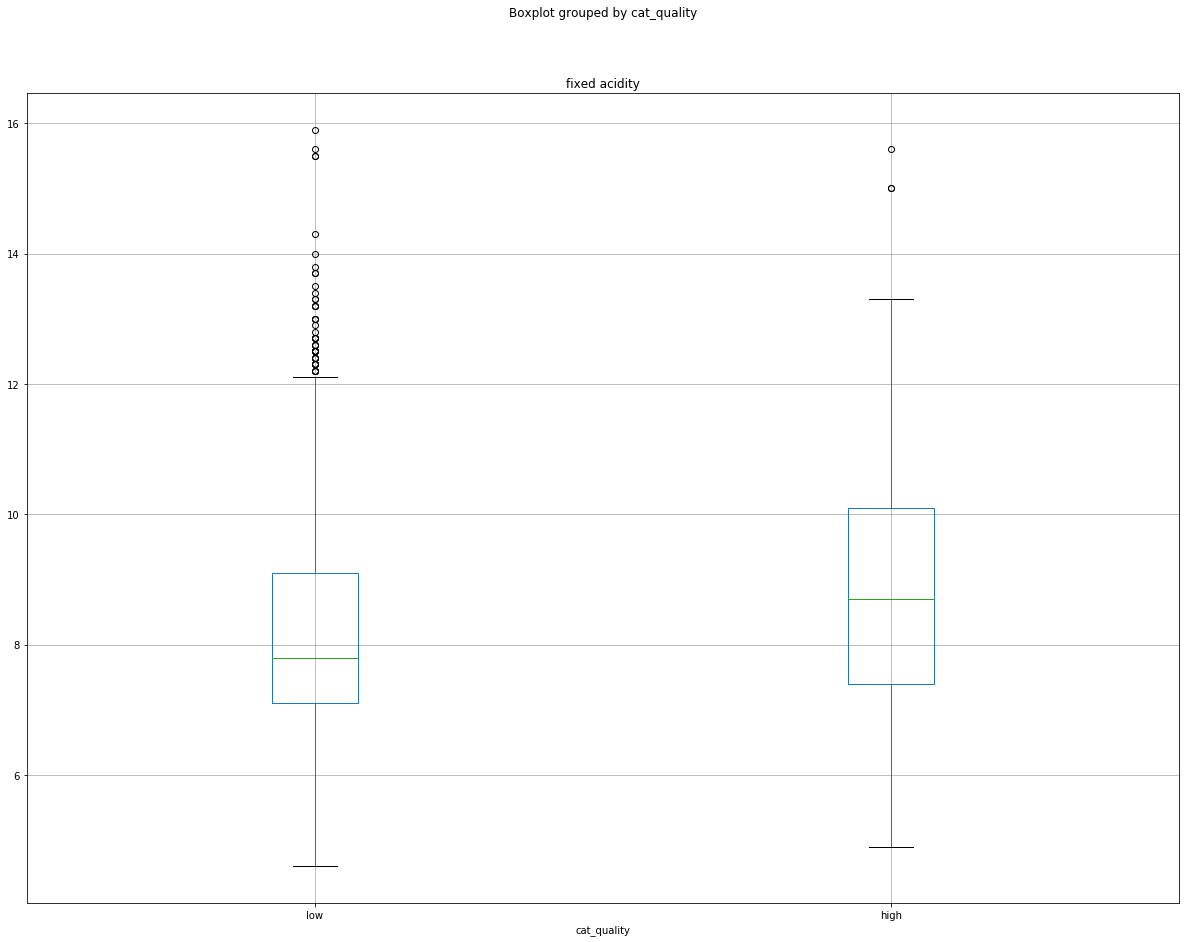

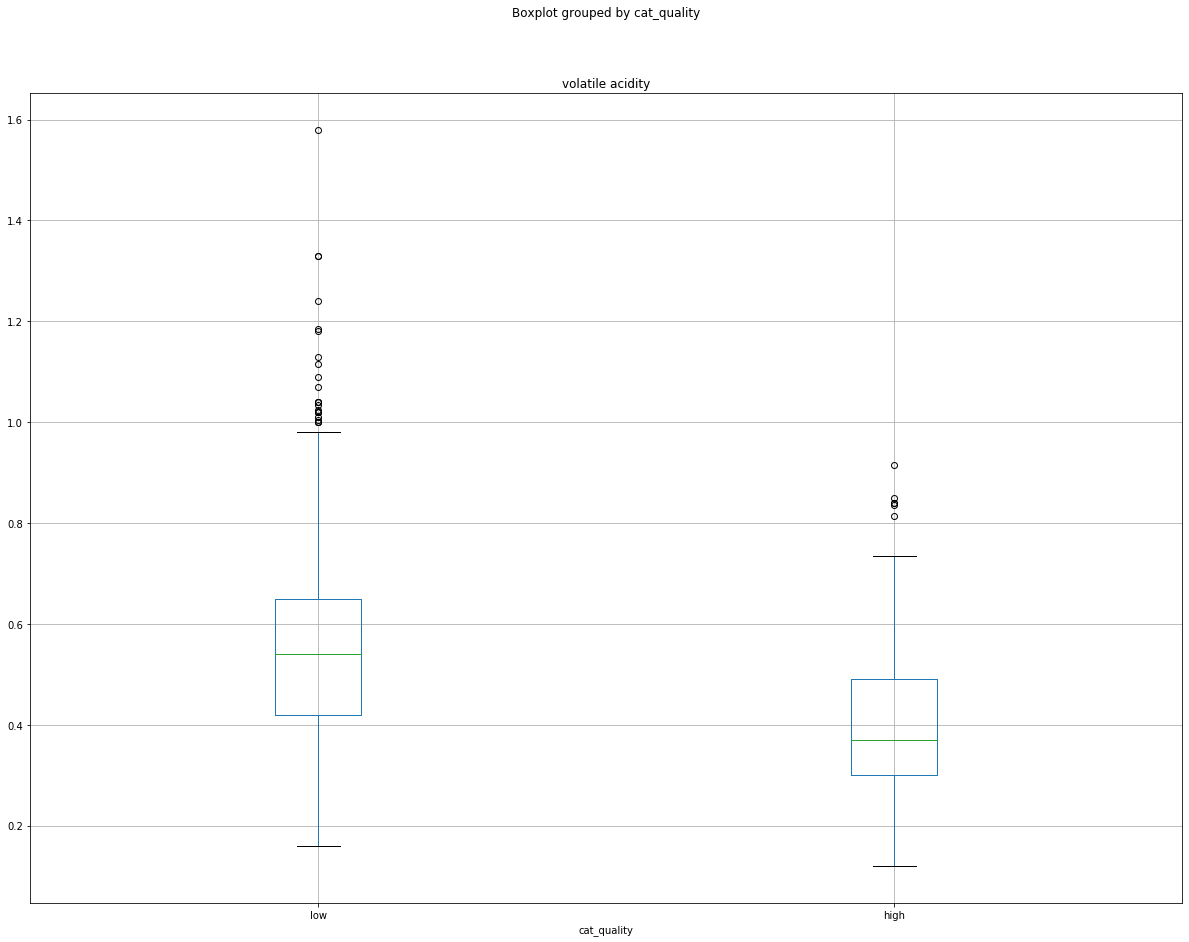

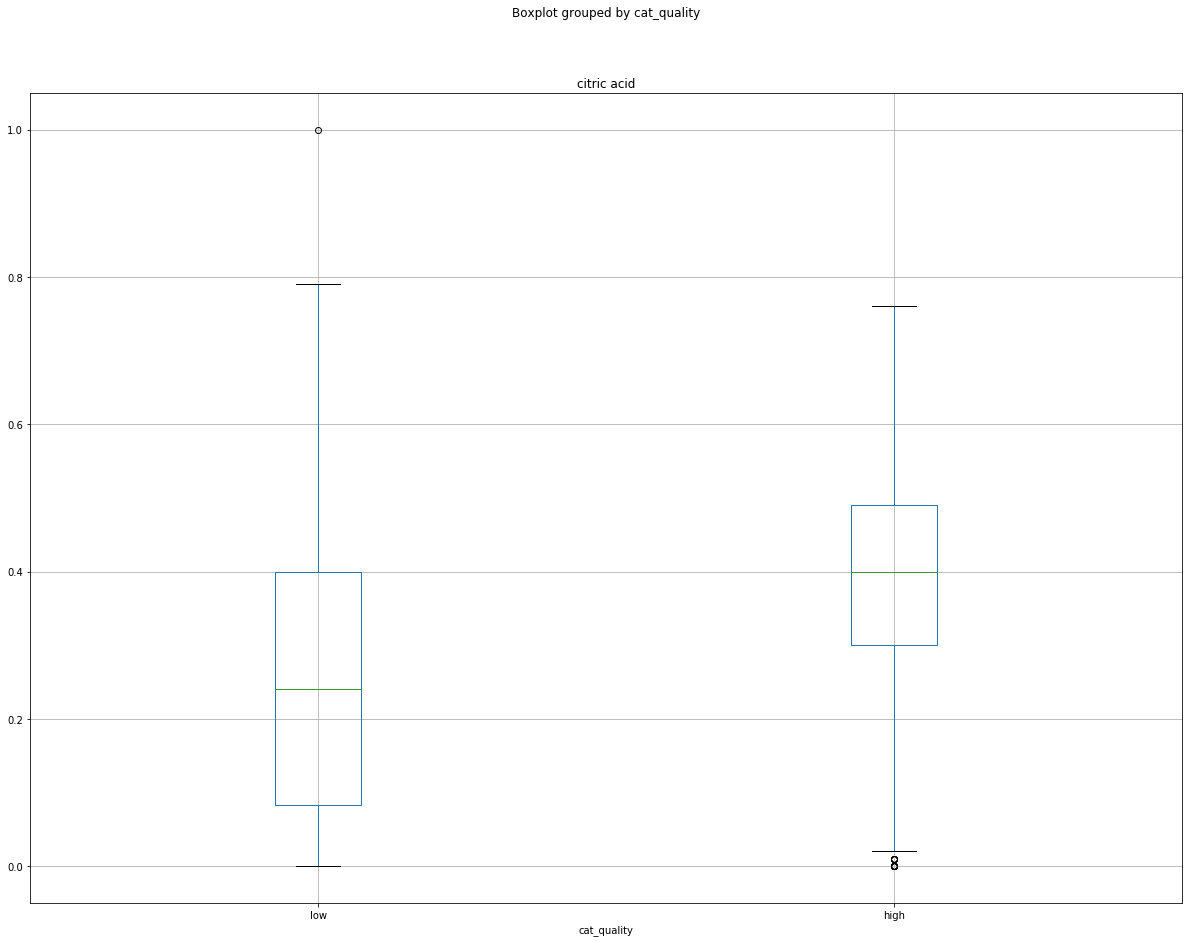

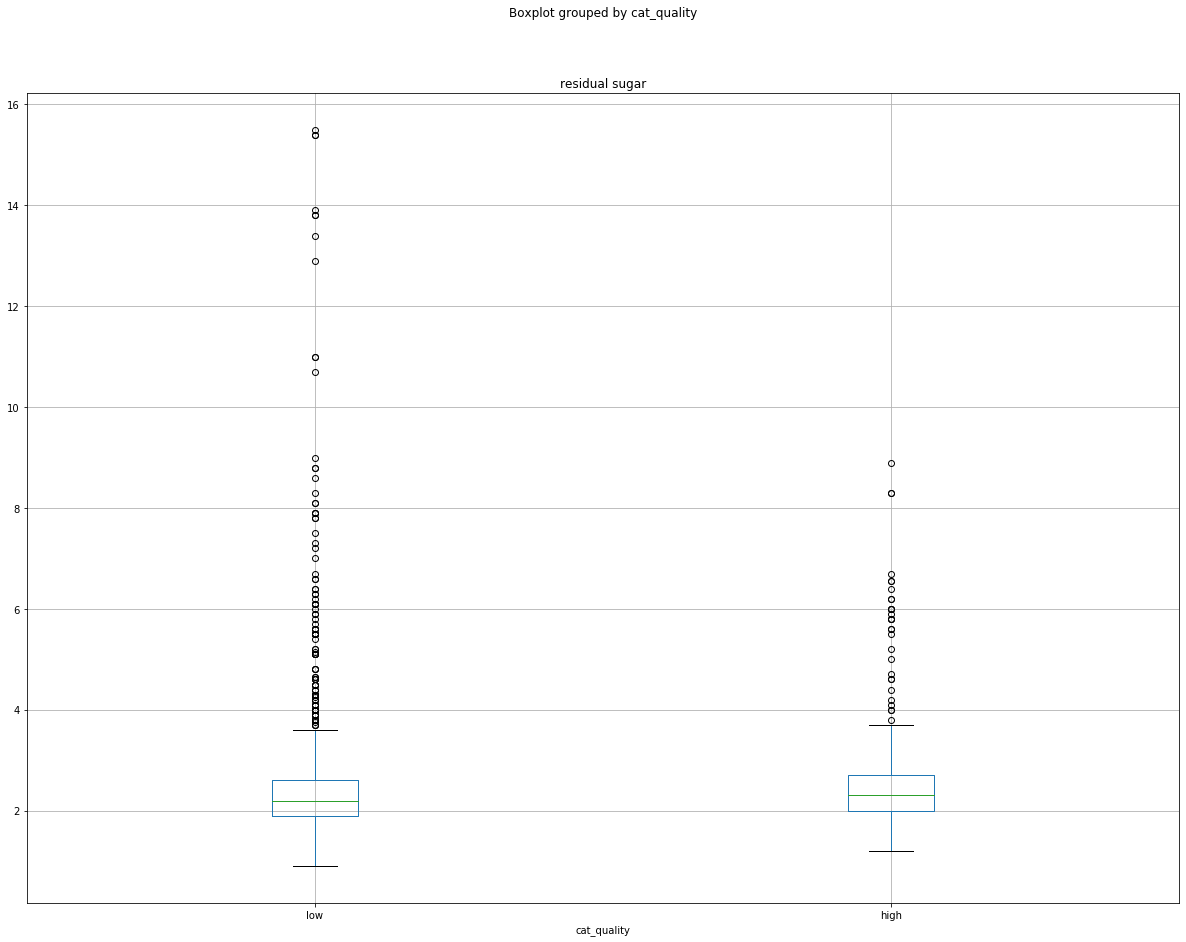

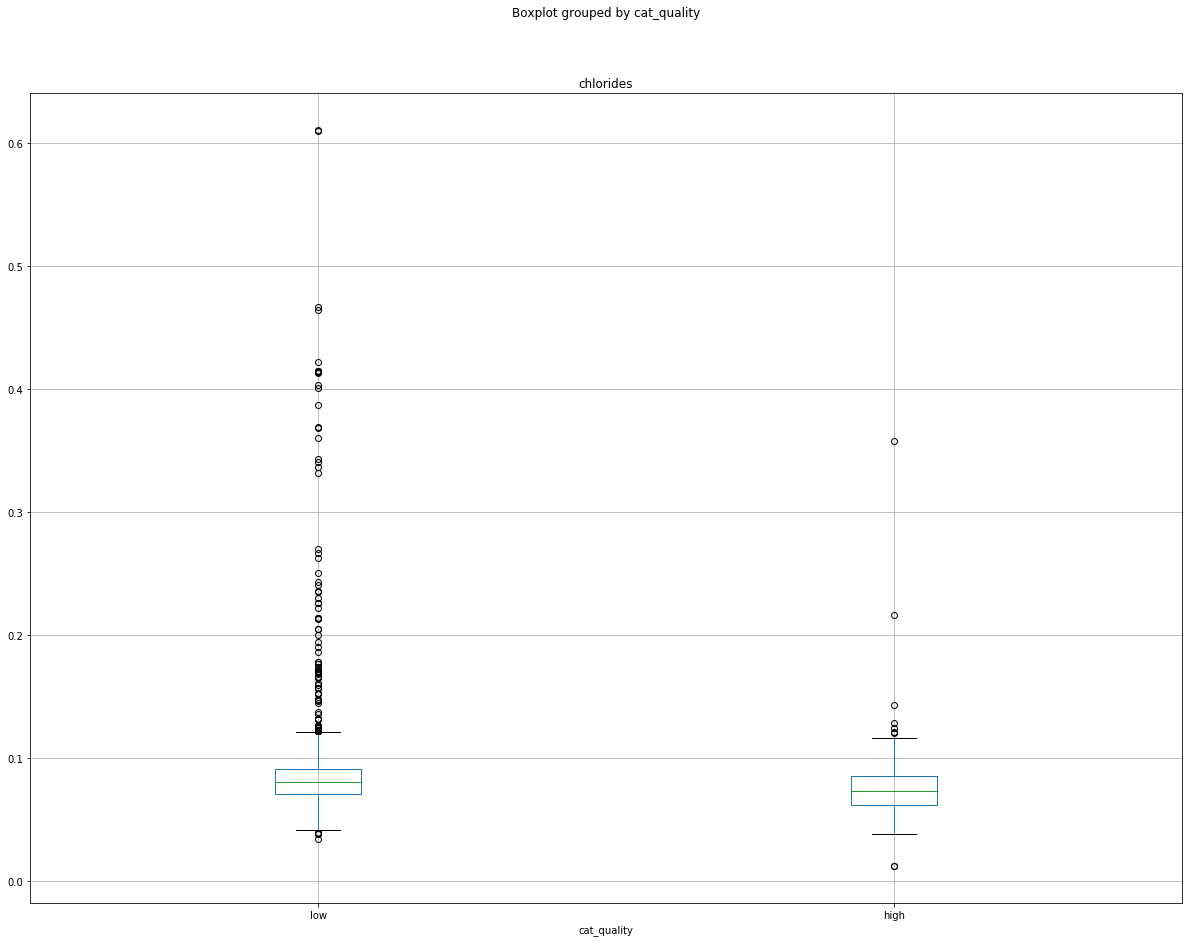

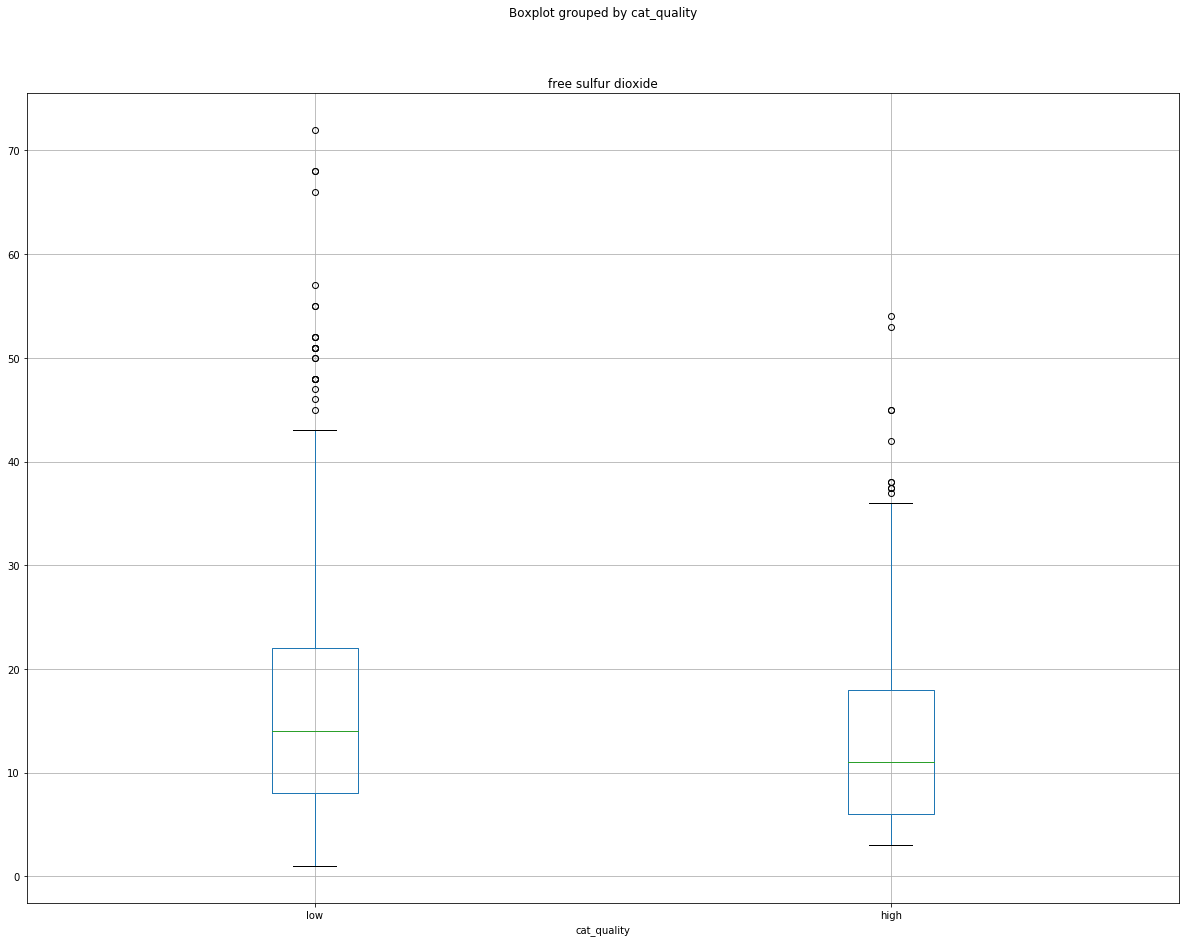

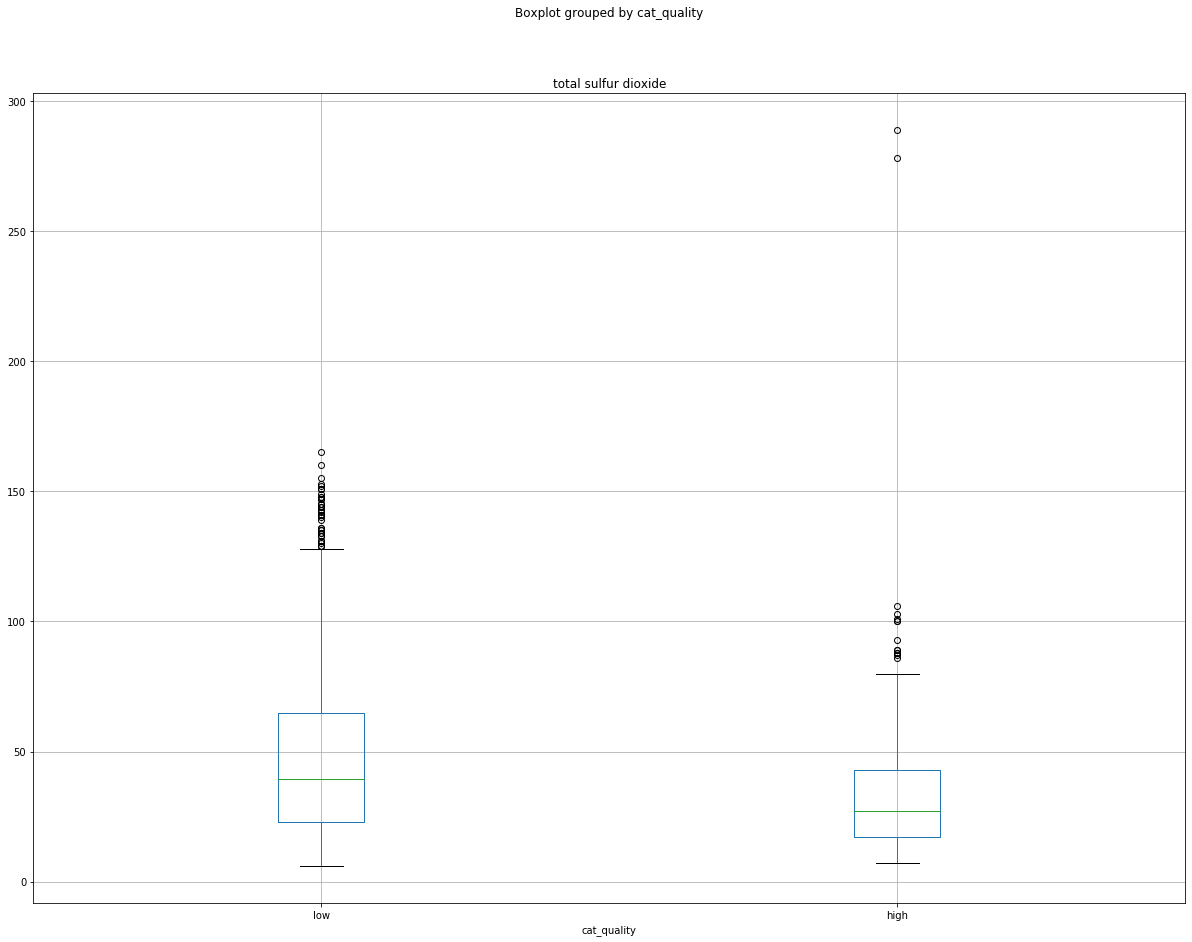

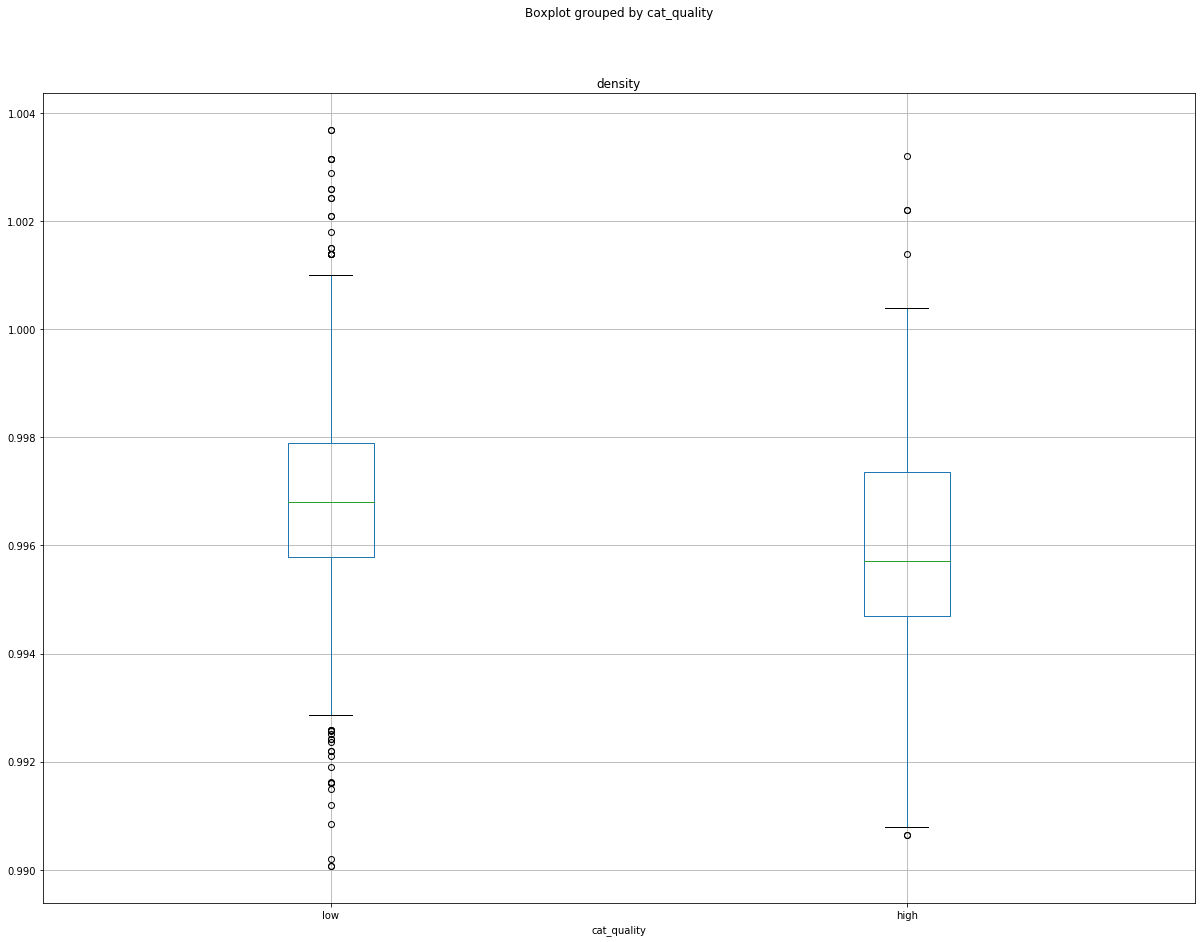

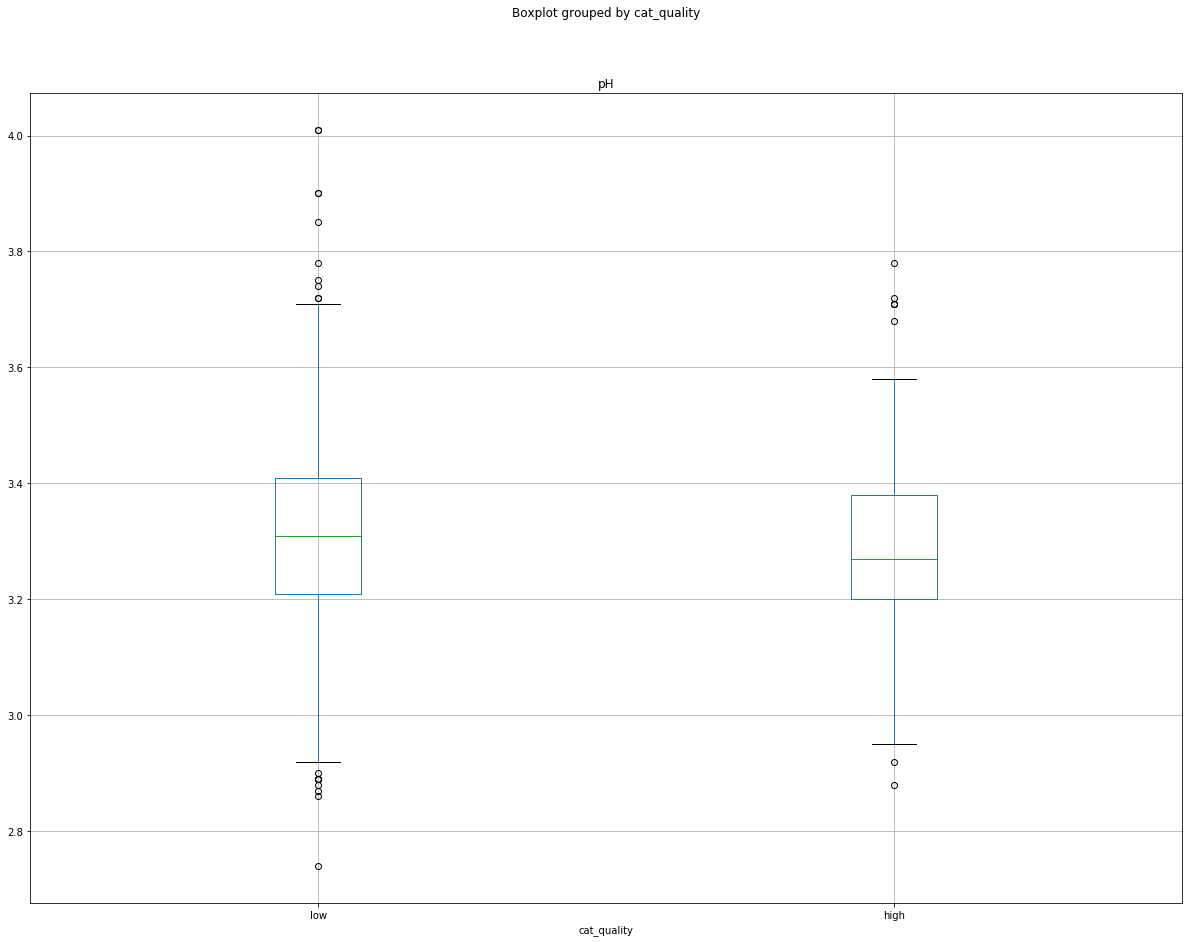

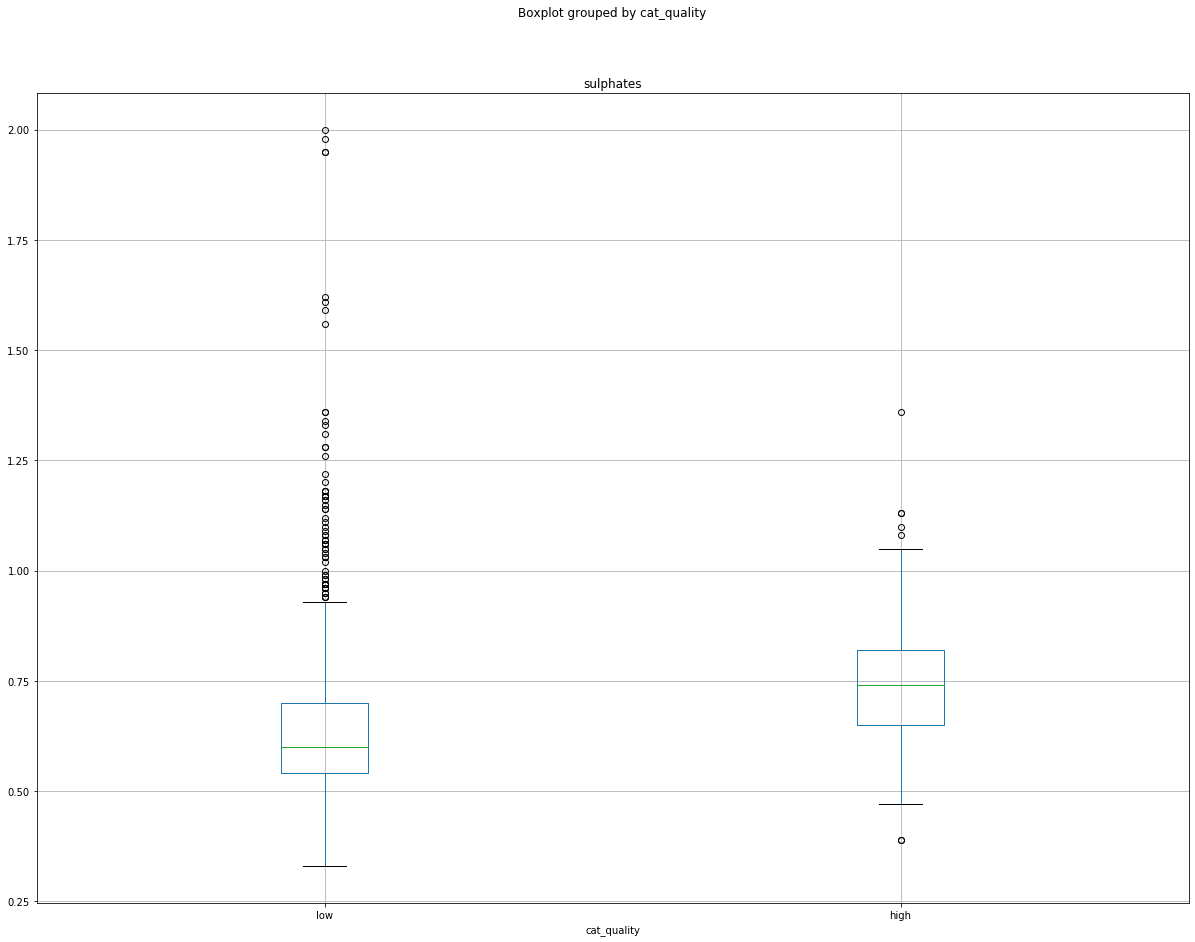

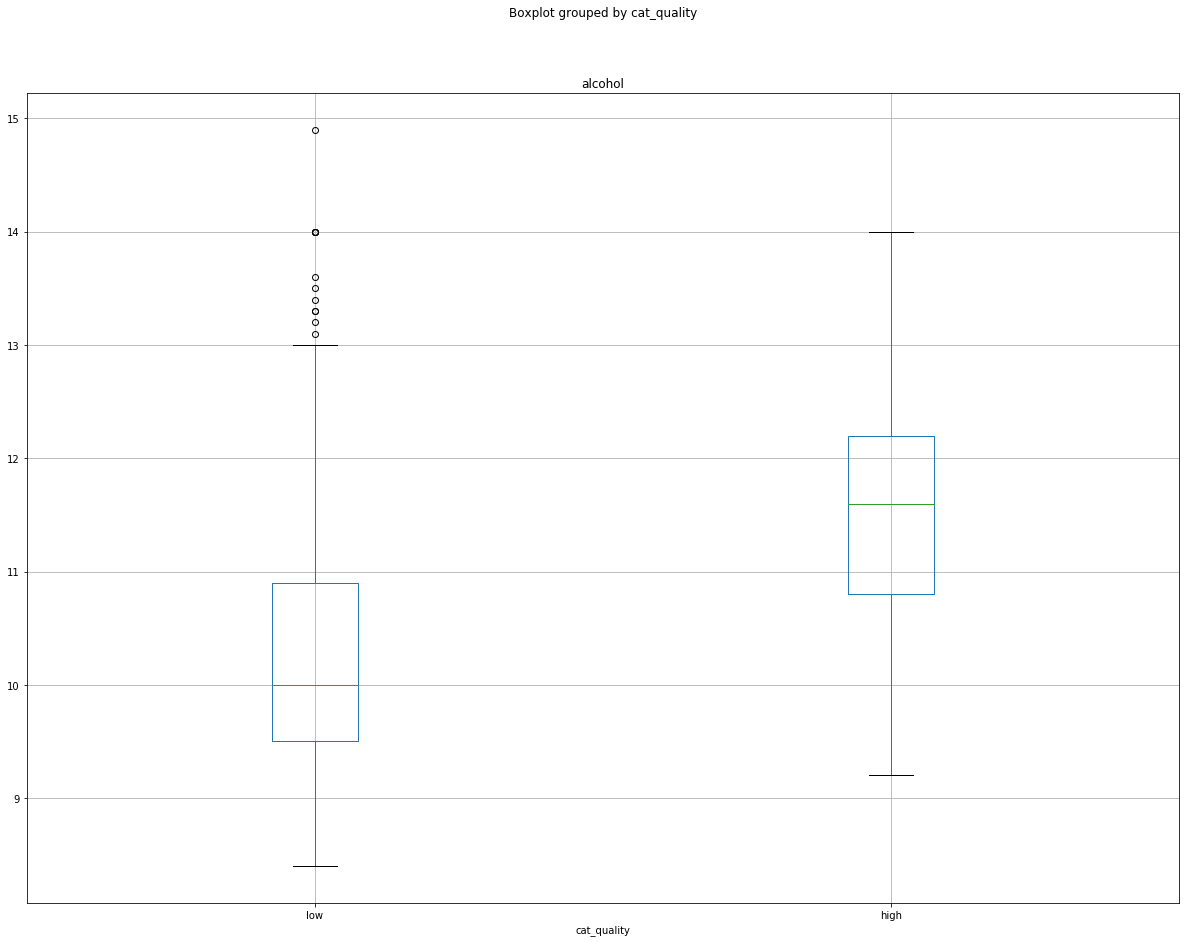

In [17]:
data.boxplot('fixed acidity', by='cat_quality')
data.boxplot('volatile acidity', by='cat_quality')
data.boxplot('citric acid', by='cat_quality')
data.boxplot('residual sugar', by='cat_quality')
data.boxplot('chlorides', by='cat_quality')
data.boxplot('free sulfur dioxide', by='cat_quality')
data.boxplot('total sulfur dioxide', by='cat_quality')
data.boxplot('density', by='cat_quality')
data.boxplot('pH', by='cat_quality')
data.boxplot('sulphates', by='cat_quality')
data.boxplot('alcohol', by='cat_quality')

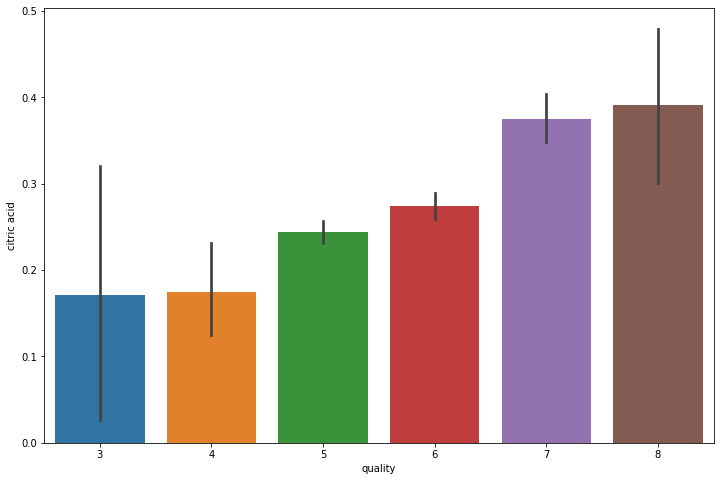

In [18]:
# The higher citric acid content the better the wine
fig = plt.figure(figsize = (12,8))
sns.barplot(x = 'quality', y = 'citric acid', data = data)

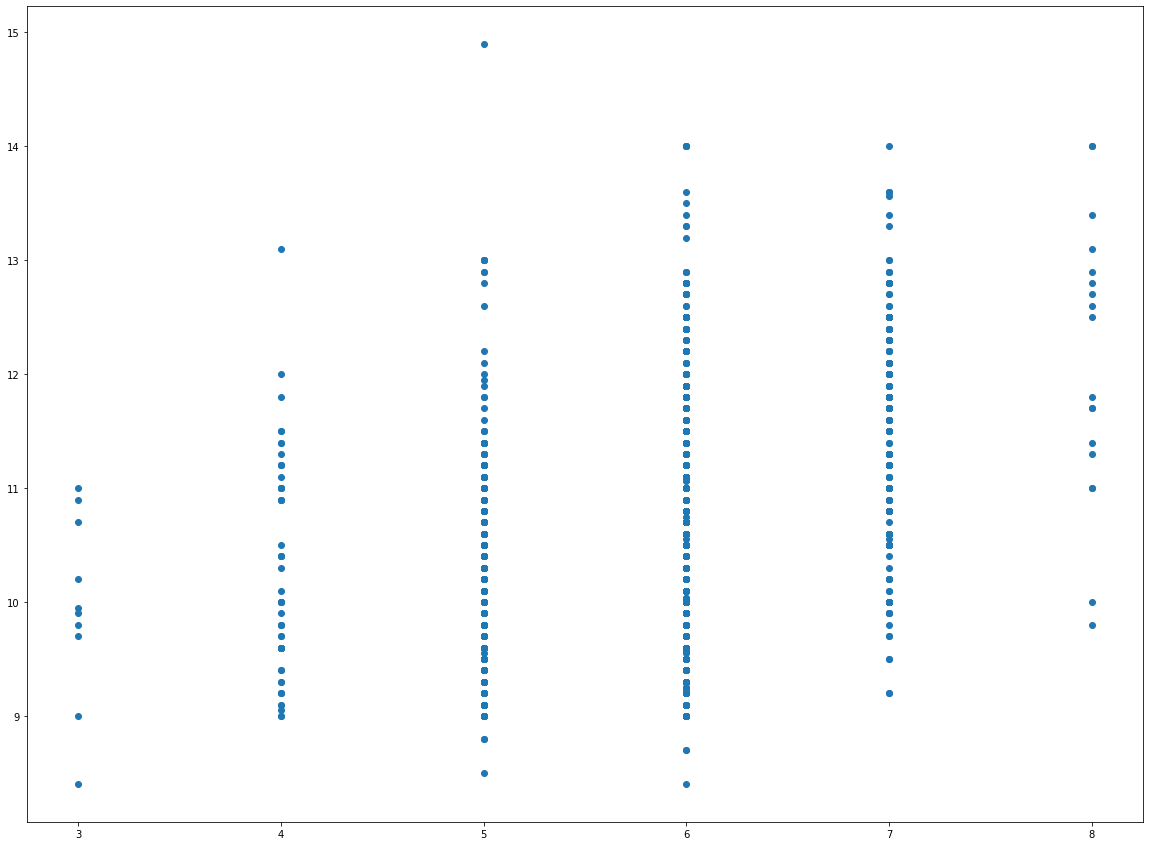

In [19]:
plt.scatter(data['quality'], data['alcohol'])
plt.show()

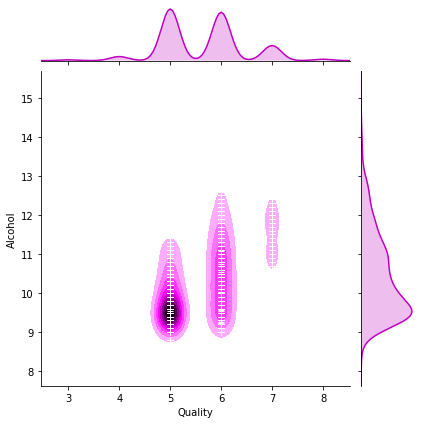

In [20]:
g =  sns.jointplot(x='quality', y='alcohol', data=data, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("Quality", "Alcohol")


In [22]:
# checking for duplicates
# data.duplicated(subset=None)
# is_duplicate = any(data.duplicated(subset=None))
# is_dupliacte


# Analysis

In [40]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()
#Bad becomes 0 and good becomes 1 
data['cat_quality'] = label_quality.fit_transform(data['cat_quality'])
# Counting ow and high values
data['cat_quality'].value_counts()

1    1382
0     217
Name: cat_quality, dtype: int64

In [24]:
# Preproscessing
# defining outcome feature
X = data.drop(['cat_quality', 'quality'], axis=1)
y = data['cat_quality']
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cat_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [41]:
# Splitting the dateframe into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [42]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [47]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [50]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.65      0.36      0.47        47
           1       0.90      0.97      0.93       273

    accuracy                           0.88       320
   macro avg       0.78      0.66      0.70       320
weighted avg       0.86      0.88      0.86       320



In [51]:
print(confusion_matrix(y_test, pred_rfc))

[[ 17  30]
 [  9 264]]
